# PROJECT 02

## TITLE : Analysis of parking meters in Vancouver City


### NAME : SUDARSAN HARIDAS

### ID : 300353099

**REFERENCES**

* https://opendata.vancouver.ca/explore/dataset/parking-meters/information/
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
* https://ipython.org/ipython-doc/dev/api/generated/IPython.display.html

**IMPORT THE LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler, LabelEncoder

from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, f_classif, RFE

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import confusion_matrix, classification_report

%run Functions/Functions_SHa53099.ipynb

#Imports all necessary libraries
#runs the functions notebook created

/Users/suduharidas/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


**READ THE DATA**

In [2]:
df = pd.read_csv('Dataset/parking-meters.csv', sep = ";")

df_copy = df.copy()

#read and keeps a copy of original data...

**VARIABLE DESCRIPTION**  
  
    - METERHEAD - Meter Head Type
    - R_MF_9A_6P - Rate Mon to Fri 9AM to 6PM
    - R_MF_6P_10 - Rate Mon to Fri 6PM to 10PM
    - R_SA_9A_6P - Rate Sat 9AM to 6PM
    - R_SA_6P_10P - Rate Sat 6PM to 10PM
    - R_SU_9A_6P - Rate Sun 9AM to 6PM
    - R_SU_6P_10P - Rate Sun 6PM to 10PM
    - RATE_MISC - Rate Miscellaneous
    - TIMEINEFFE - Time in Effect
    - T_MF_9A_6P - Time Limit Mon to Fri 9AM to 6PM
    - T_MF_6P_10 - Time Limit Mon to Fri 6PM to 10PM
    - T_SA_9A_6P - Time Limit Sat 9AM to 6PM
    - T_SA_6P_10P - Time Limit Sat 6PM to 10PM
    - T_SU_9A_6P - Time Limit Sun 9AM to 6PM
    - T_SU_6P_10P - Time Limit Sun 6PM to 10PM
    - TIME_MISC - Time Limit Miscelleaneous
    - CREDITCARD - Credit Card Enabled
    - PAY_PHONE - Pay by Phone Number
    - Geom - Spatial representation of meter location
    - Geo local area - Locality
    - METERID - Unique identifier generated by system
    - geo_point_2d - Latitude and Longitude

In [3]:
df.head()

#gives first 5 rows of data to peek...

,METERHEAD,R_MF_9A_6P,R_MF_6P_10,R_SA_9A_6P,R_SA_6P_10,R_SU_9A_6P,R_SU_6P_10,RATE_MISC,TIMEINEFFE,T_MF_9A_6P,...,T_SA_6P_10,T_SU_9A_6P,T_SU_6P_10,TIME_MISC,CREDITCARD,PAY_PHONE,Geom,Geo Local Area,METERID,geo_point_2d
0,Twin,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,...,4 Hr,2 Hr,4 Hr,NaN,No,54045,"{""coordinates"": [-123.14273600830685, 49.26357...",Fairview,301634,"49.26357646765526, -123.14273600830685"
1,Twin,$4.00,$3.00,$4.00,$3.00,$4.00,$3.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,...,4 Hr,2 Hr,4 Hr,NaN,No,54039,"{""coordinates"": [-123.14703537912433, 49.27062...",Kitsilano,B11828,"49.270626013727025, -123.14703537912433"
2,Twin,$4.00,$3.00,$4.00,$3.00,$4.00,$3.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,...,4 Hr,2 Hr,4 Hr,NaN,No,52721,"{""coordinates"": [-123.14720900627181, 49.27062...",Kitsilano,B11834,"49.27062867111242, -123.14720900627181"
3,Twin,$4.00,$3.00,$4.00,$3.00,$4.00,$3.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,...,4 Hr,2 Hr,4 Hr,NaN,No,52749,"{""coordinates"": [-123.14737974666724, 49.27063...",Kitsilano,B11836,"49.27063133191907, -123.14737974666724"
4,Twin,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,3 Hr,...,4 Hr,3 Hr,4 Hr,NaN,No,52756,"{""coordinates"": [-123.1554205290986, 49.236104...",Arbutus Ridge,935508,"49.236104158233125, -123.1554205290986"


In [4]:
df.info()

#Gives data-type and number of non-null values in each dataset...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7475 entries, 0 to 7474
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   METERHEAD       7473 non-null   object
 1   R_MF_9A_6P      7475 non-null   object
 2   R_MF_6P_10      7475 non-null   object
 3   R_SA_9A_6P      7475 non-null   object
 4   R_SA_6P_10      7475 non-null   object
 5   R_SU_9A_6P      7475 non-null   object
 6   R_SU_6P_10      7475 non-null   object
 7   RATE_MISC       709 non-null    object
 8   TIMEINEFFE      7446 non-null   object
 9   T_MF_9A_6P      7473 non-null   object
 10  T_MF_6P_10      7473 non-null   object
 11  T_SA_9A_6P      7473 non-null   object
 12  T_SA_6P_10      7473 non-null   object
 13  T_SU_9A_6P      7473 non-null   object
 14  T_SU_6P_10      7473 non-null   object
 15  TIME_MISC       524 non-null    object
 16  CREDITCARD      7473 non-null   object
 17  PAY_PHONE       7475 non-null   int64 
 18  Geom    

In [5]:
df.isnull().sum()

#gives count of null values in each column...

METERHEAD            2
R_MF_9A_6P           0
R_MF_6P_10           0
R_SA_9A_6P           0
R_SA_6P_10           0
R_SU_9A_6P           0
R_SU_6P_10           0
RATE_MISC         6766
TIMEINEFFE          29
T_MF_9A_6P           2
T_MF_6P_10           2
T_SA_9A_6P           2
T_SA_6P_10           2
T_SU_9A_6P           2
T_SU_6P_10           2
TIME_MISC         6951
CREDITCARD           2
PAY_PHONE            0
Geom                 0
Geo Local Area       0
METERID              0
geo_point_2d         0
dtype: int64

In [6]:
df.drop(['RATE_MISC','TIME_MISC','Geom', 'geo_point_2d', 'METERID', 'TIMEINEFFE','PAY_PHONE'], axis = 1, inplace = True)

#Removes the unnecessary columns and columns with too many missing values...
#RATE_MISC and TIME_MISC -- too many missing values and no value added to the analysis...
#Geom, geo_point_2d -- cannot handle geographical data...
#METERID, TIMEINEFFE -- no value added to analysis...

In [7]:
df.isnull().sum()

#still a few missing values...

METERHEAD         2
R_MF_9A_6P        0
R_MF_6P_10        0
R_SA_9A_6P        0
R_SA_6P_10        0
R_SU_9A_6P        0
R_SU_6P_10        0
T_MF_9A_6P        2
T_MF_6P_10        2
T_SA_9A_6P        2
T_SA_6P_10        2
T_SU_9A_6P        2
T_SU_6P_10        2
CREDITCARD        2
Geo Local Area    0
dtype: int64

In [8]:
df.dropna(inplace = True)

df.isnull().sum().sum()

#drops rows with any missing values...

0

In [9]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

#convert all column names to lowercase and replace spaces with underscore (helps autocomplete)...

In [10]:
df.head()

,meterhead,r_mf_9a_6p,r_mf_6p_10,r_sa_9a_6p,r_sa_6p_10,r_su_9a_6p,r_su_6p_10,t_mf_9a_6p,t_mf_6p_10,t_sa_9a_6p,t_sa_6p_10,t_su_9a_6p,t_su_6p_10,creditcard,geo_local_area
0,Twin,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,No,Fairview
1,Twin,$4.00,$3.00,$4.00,$3.00,$4.00,$3.00,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,No,Kitsilano
2,Twin,$4.00,$3.00,$4.00,$3.00,$4.00,$3.00,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,No,Kitsilano
3,Twin,$4.00,$3.00,$4.00,$3.00,$4.00,$3.00,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,No,Kitsilano
4,Twin,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,3 Hr,4 Hr,3 Hr,4 Hr,3 Hr,4 Hr,No,Arbutus Ridge


In [11]:
df.t_mf_6p_10.value_counts()

4 Hr             7198
No Time Limit     166
26 Hrs             50
10 Hrs             33
30 min             19
other               1
2 Hr                1
3 Hr                1
Name: t_mf_6p_10, dtype: int64

**DATA ENGINEERING**

In [12]:
df.r_mf_9a_6p = df.r_mf_9a_6p.apply(lambda x: dollar_remover(x))
df.r_mf_6p_10 = df.r_mf_6p_10.apply(lambda x: dollar_remover(x))
df.r_sa_9a_6p = df.r_sa_9a_6p.apply(lambda x: dollar_remover(x))
df.r_sa_6p_10 = df.r_sa_6p_10.apply(lambda x: dollar_remover(x))
df.r_su_9a_6p = df.r_su_9a_6p.apply(lambda x: dollar_remover(x))
df.r_su_6p_10 = df.r_su_6p_10.apply(lambda x: dollar_remover(x))

#removes all $ symbols in currency columns

In [13]:
df.t_mf_9a_6p = df.t_mf_9a_6p.apply(lambda x: hour_remover(x))
df.t_mf_6p_10 = df.t_mf_6p_10.apply(lambda x: hour_remover2(x))
df.t_sa_9a_6p = df.t_sa_9a_6p.apply(lambda x: hour_remover(x))
df.t_sa_6p_10 = df.t_sa_6p_10.apply(lambda x: hour_remover2(x))
df.t_su_9a_6p = df.t_su_9a_6p.apply(lambda x: hour_remover(x))
df.t_su_6p_10 = df.t_su_6p_10.apply(lambda x: hour_remover2(x))

#removes all Hr symbols in time columns

In [14]:
df['avg_rate_mf'] = df[['r_mf_9a_6p','r_mf_6p_10']].mean(axis = 1)

df['avg_rate_sa'] = df[['r_sa_9a_6p','r_sa_6p_10']].mean(axis = 1)

df['avg_rate_su'] = df[['r_su_9a_6p','r_su_6p_10']].mean(axis = 1)

df['avg_rate_week'] = df[['r_mf_9a_6p','r_mf_6p_10','r_sa_9a_6p','r_sa_6p_10','r_su_9a_6p','r_su_6p_10']].mean(axis = 1)

#calculates average rate for weekdays, saturday, sunday and entire week...

In [15]:
df['avg_time_limit_mf'] = df[['t_mf_9a_6p','t_mf_6p_10']].mean(axis = 1)

df['avg_time_limit_sa'] = df[['t_sa_9a_6p','t_sa_6p_10']].mean(axis = 1)

df['avg_time_limit_su'] = df[['t_su_9a_6p','t_su_6p_10']].mean(axis = 1)

df['avg_time_limit_week'] = df[['t_mf_9a_6p','t_mf_6p_10','t_sa_9a_6p','t_sa_6p_10','t_su_9a_6p','t_su_6p_10']].mean(axis = 1)

#calculates average time limit for weekdays, saturday, sunday and entire week...

In [16]:
df['avg_amount_spent_mf'] = df.avg_rate_mf * df.avg_time_limit_mf

df['avg_amount_spent_sa'] = df.avg_rate_sa * df.avg_time_limit_sa

df['avg_amount_spent_su'] = df.avg_rate_su * df.avg_time_limit_su

df['avg_amount_spent_week'] = df.avg_rate_week * df.avg_time_limit_week


#calculates average amount someone spends on weekdays, saturday, sunday and entire week...

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7474
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   meterhead              7469 non-null   object 
 1   r_mf_9a_6p             7469 non-null   float64
 2   r_mf_6p_10             7469 non-null   float64
 3   r_sa_9a_6p             7469 non-null   float64
 4   r_sa_6p_10             7469 non-null   float64
 5   r_su_9a_6p             7469 non-null   float64
 6   r_su_6p_10             7469 non-null   float64
 7   t_mf_9a_6p             7469 non-null   float64
 8   t_mf_6p_10             7469 non-null   float64
 9   t_sa_9a_6p             7469 non-null   float64
 10  t_sa_6p_10             7469 non-null   float64
 11  t_su_9a_6p             7469 non-null   float64
 12  t_su_6p_10             7469 non-null   float64
 13  creditcard             7469 non-null   object 
 14  geo_local_area         7469 non-null   object 
 15  avg_

In [18]:
df.describe()

,r_mf_9a_6p,r_mf_6p_10,r_sa_9a_6p,r_sa_6p_10,r_su_9a_6p,r_su_6p_10,t_mf_9a_6p,t_mf_6p_10,t_sa_9a_6p,t_sa_6p_10,...,avg_rate_su,avg_rate_week,avg_time_limit_mf,avg_time_limit_sa,avg_time_limit_su,avg_time_limit_week,avg_amount_spent_mf,avg_amount_spent_sa,avg_amount_spent_su,avg_amount_spent_week
count,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,...,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000,7469.000000
mean,2.508636,1.866046,2.508636,1.866046,2.508569,1.877761,2.457424,3.990695,2.478578,3.989289,...,2.193165,2.189282,3.224059,3.233934,3.233097,3.230363,6.874582,6.900723,6.917241,6.897515
std,1.862532,1.494286,1.862532,1.494286,1.862506,1.547694,1.331852,0.178183,1.327729,0.185199,...,1.437860,1.425986,0.678332,0.676755,0.677124,0.672986,4.341244,4.358620,4.396287,4.353095
min,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.500000,1.250000,1.250000,1.500000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,4.000000,2.000000,4.000000,...,1.500000,1.500000,3.000000,3.000000,3.000000,3.000000,5.250000,5.250000,5.250000,5.250000
75%,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,4.000000,3.000000,4.000000,...,3.000000,3.000000,3.000000,3.500000,3.500000,3.500000,9.000000,9.000000,9.000000,9.000000
max,11.000000,8.000000,11.000000,8.000000,11.000000,15.000000,9.000000,4.000000,9.000000,4.000000,...,8.500000,8.000000,6.500000,6.500000,6.500000,6.500000,26.000000,26.000000,26.000000,26.000000


Text(0.5, 1, 'Correlation Matrix Heatmap')

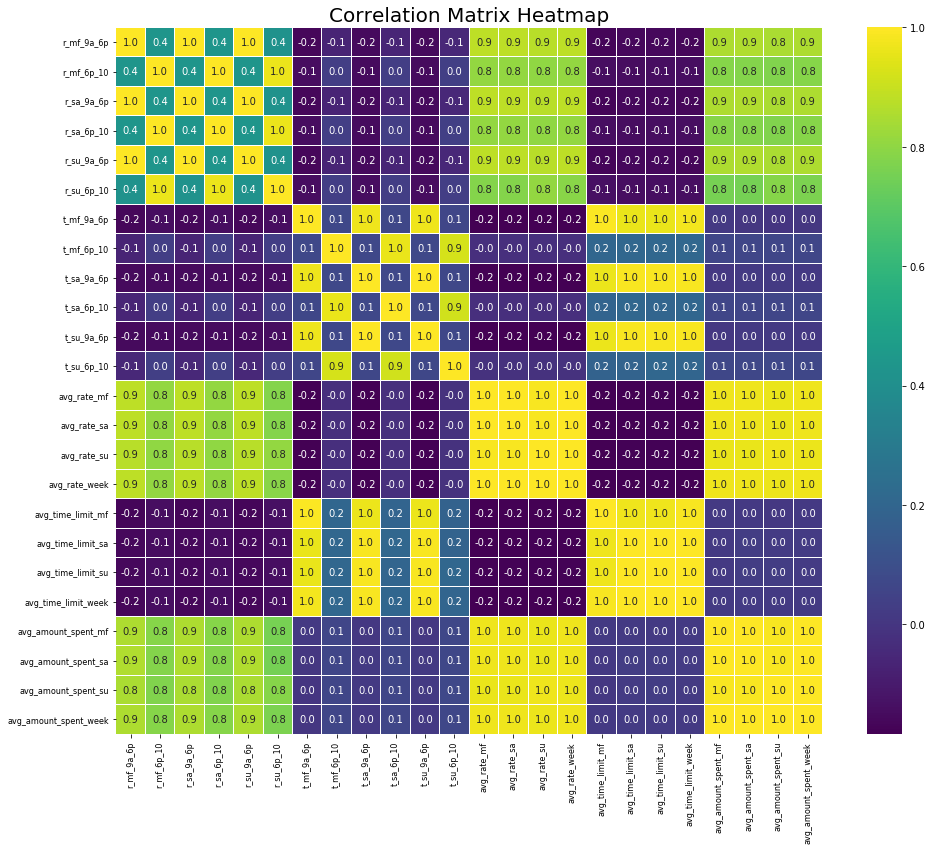

In [19]:
df_corr_matrix = df.corr()
#saves the correaltion matrix in a new dataframe...


plt.figure(figsize = (16,13))
sns.heatmap(df_corr_matrix, annot = True,square = True , fmt = ".1f", linewidth = 0.1, cmap = "viridis")
plt.tick_params(labelsize = 8)
plt.title("Correlation Matrix Heatmap", fontsize = 20)

#plots heatmap using the correlation matrix...

#the lighter colours have higher correaltion values than darker colours...

**EXPLORATORY DATA ANALYSIS**

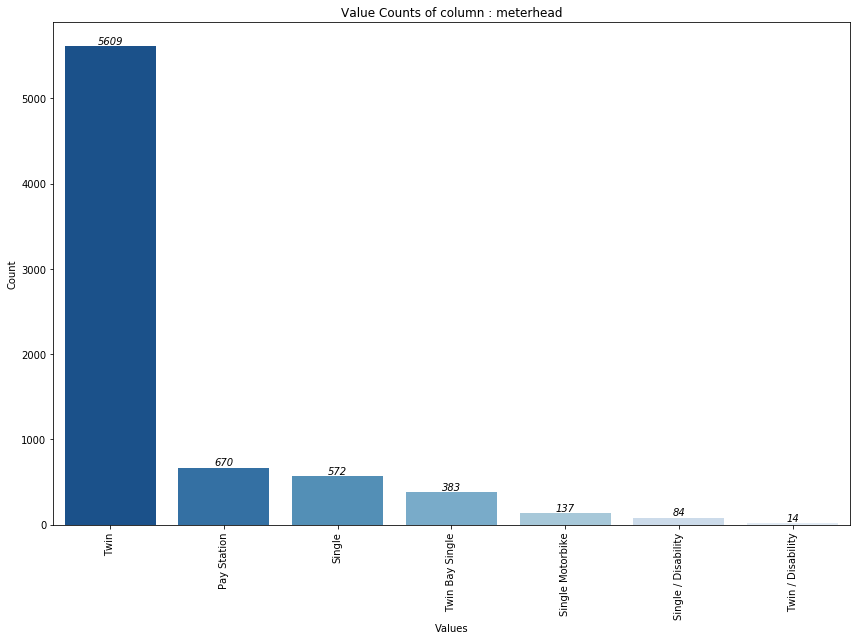

In [20]:
counts_plot('meterhead', 'Blues_r')

#Gives a count plot of the column mentioned...

    - 75% of parking meter heads are 'TWIN' which are very old installations.

In [21]:
df.meterhead = df.meterhead.apply(lambda x: meterhead_group(x))

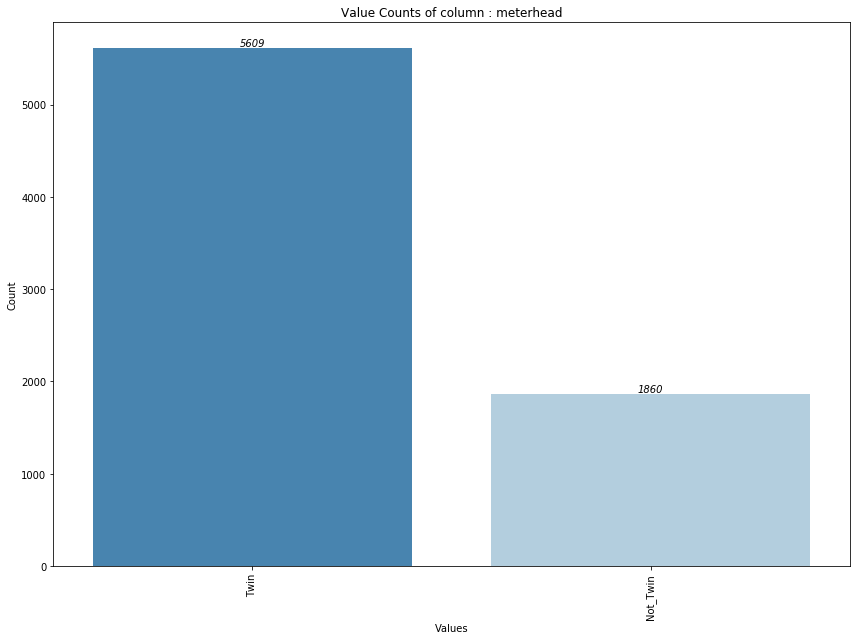

In [22]:
counts_plot('meterhead', 'Blues_r')

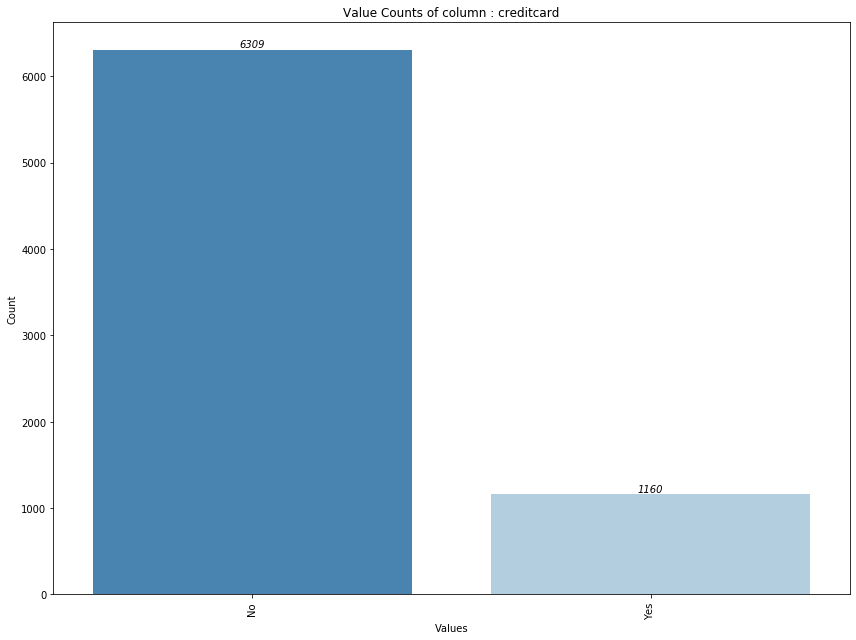

In [23]:
counts_plot('creditcard', 'Blues_r')

    - The number of TWIN meterheads also represent why 85% of the meters do not accept card payments...

In [24]:
print("{:.2f}%".format((1160/(1160+6309)*100)))

15.53%


**Only 15.53% of parking meters allow credit card payments**

**It might also be safe to assume that most TWIN meterheads are old installations and therefore do not accept creditcards**

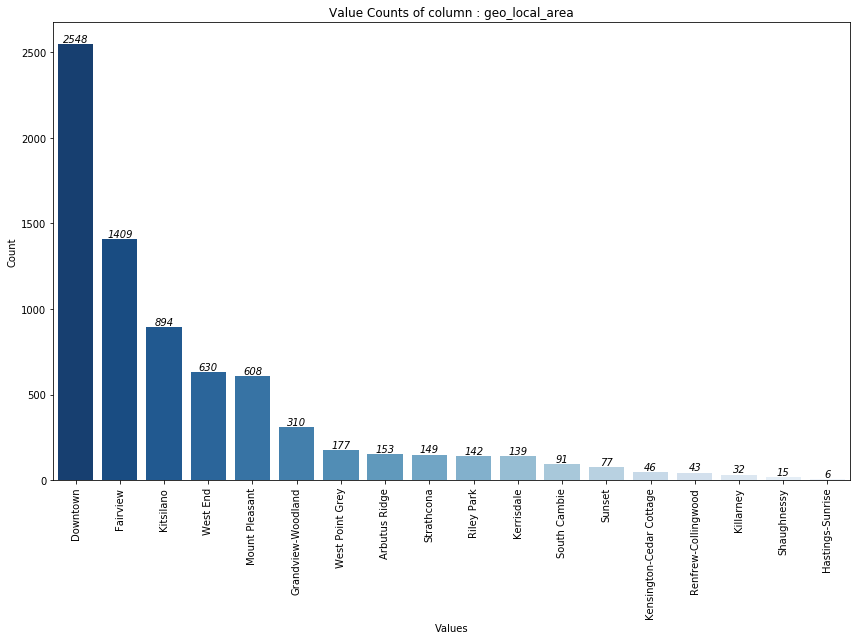

In [25]:
counts_plot('geo_local_area', 'Blues_r')

    - 34% of all parking meters in the city are in the DOWNTOWN area.
    - 47% of the other parking meters are located close to the DOWNTOWN area.

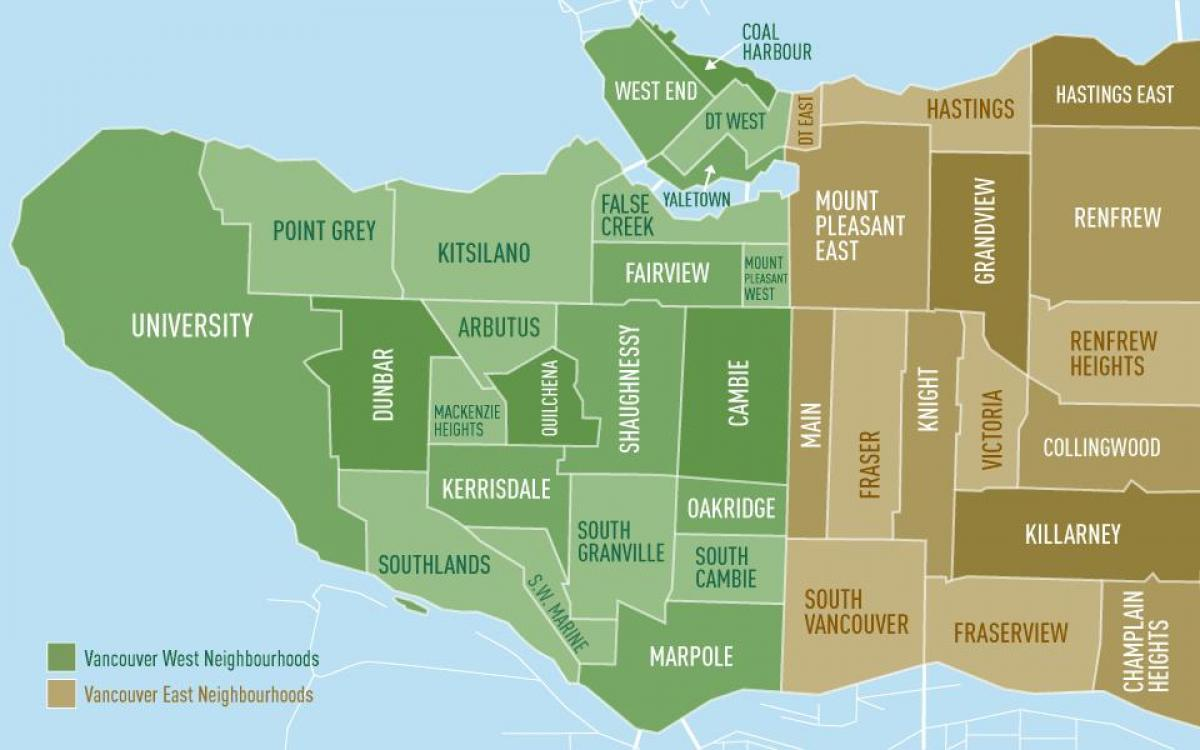

In [26]:
from IPython.display import Image

Image('Report/vancouver-neighborhood-map.jpg')

#Displays the specified image file...

**CITY AREA GROUPING**

(Any area left to Fraser Street is taken as Lower Mainland...)   
   
    - Lower Mainland : Fairview, Kitsilano, West Point Grey, Arbutus Ridge, Kerrisdale, South Cambie, 
    Shaughnessy 
    - Downtown : Downtown, West End
    - East Vancouver : Grandview-Woodland, Strathcona, Sunset, Riley Park, Mount Pleasant, 
    Kensington-Cedar Cottage, Renfrew-Collingwood, Killarney, Hastings-Sunrise

In [27]:
df.geo_local_area = df.geo_local_area.apply(lambda x: city_group(x))

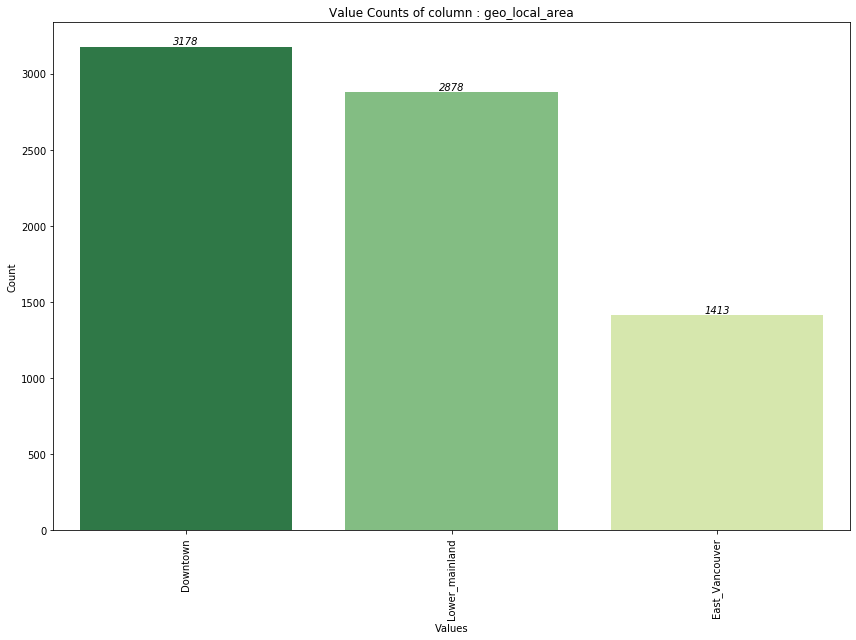

In [28]:
counts_plot('geo_local_area', "YlGn_r")

**SAVE THE CLEANED DATASET**

In [29]:
df = df.reset_index()

df.drop('index',axis = 1, inplace = True)

#Reset index creates a new column 'index' and needs to be removed...

In [30]:
df.to_csv('Dataset/final_dataset.csv', index = False)

#saves the final cleaned dataframe...

## CLASSIFICATION (Target - geo_local_area) 

**SPLIT THE DATA**

In [31]:
features = data_split(df,'geo_local_area')

target = data_split2(df,'geo_local_area')


#Splits the data into features and target...

In [32]:
target

0       Lower_mainland
1       Lower_mainland
2       Lower_mainland
3       Lower_mainland
4       Lower_mainland
             ...      
7464          Downtown
7465          Downtown
7466          Downtown
7467    Lower_mainland
7468    Lower_mainland
Name: geo_local_area, Length: 7469, dtype: object

In [33]:
target = LabelEncoder().fit_transform(target)

#codes the categorical columns with numbers..
#unlike dummy columns, label encoder gives continous numbers to represent categories within a single column..

In [34]:
target

array([2, 2, 2, ..., 0, 2, 2])

**Class labels**

    - 0 : Downtown
    - 1 : East_Vancouver
    - 2 : Lower_mainland

**CREATE DUMMIES**

In [35]:
features = pd.get_dummies(features, drop_first = True)

#Creates dummies for all categorical columns...

**CLASSIFICATION MODEL PIPELINE**

In [36]:
feature_selection_name = ['Variance Threshold', 'Select K Best', 'Select from model', 'Recursive Feature Elimination']

#list of feature selection methods...

In [37]:
for i, f_sel in enumerate(feature_selection_name):
    
    if i == 0:
        
        sel_var_features = select_variance(features, 0.2)
    
    elif i == 1:
        
        sel_best_features = select_best(features, target, 15)
        
    elif i == 2:
        
        sel_model_features = select_from_model(features, target)
        
        
    rfe_features = recursive_fe(features, target, 15)
    
    
    
    
list_of_clf_features = [features, sel_var_features, sel_best_features, sel_model_features, rfe_features]


#iterates through different feature selection methods and saves all returned feature sets...

In [38]:
name_of_clf_model = ['Logistic Regression', 'KNN', 'Linear SVC', 'SVM RBF', 'Decision Tree', 
                'Naive Bayes', 'Random Forest Classifier', 'AdaBoost Classifier', 
                'XGBoost Classifier', 'CatBoost Classifier']

score_of_clf_model = []


list_of_clf_models = [
    LogisticRegression(max_iter = 10000),
    KNeighborsClassifier(),
    SVC(kernel = "linear", C = 1),
    SVC(kernel = "rbf", C = 1, gamma = "auto"),
    DecisionTreeClassifier(max_depth = 5),
    GaussianNB(),
    RandomForestClassifier(max_depth = 5, n_estimators = 100),
    AdaBoostClassifier(),
    XGBClassifier(),
    CatBoostClassifier(learning_rate = 0.1,verbose = False)
]

feature_selection_method = []
clf_model_name = []

#list of classification model names..
#empty list to hold score of each model...
#List of clf models

In [39]:
for n,ft in enumerate(list_of_clf_features):


    x_train, x_test, y_train, y_test = train_test_split(ft, target, test_size = 0.25, random_state = 99)

    #splitting train and test data..

    for i, clf in enumerate(list_of_clf_models):
            

            pipe = Pipeline(
            [
                ('Scaler', RobustScaler()),
                (name_of_clf_model[i], clf)
            ]
            )

            pipe.fit(x_train, y_train)
            
            clf_model_name.append(name_of_clf_model[i])

            score_of_clf_model.append(pipe.score(x_test, y_test))
            
            if n == 0:
                feature_selection_method.append("None")
                
            elif n == 1:
                feature_selection_method.append("Variance Threshold")
            
            elif n == 2:
                feature_selection_method.append("Select K Best")
                
            elif n == 3:
                feature_selection_method.append("Select From Model")
                
            elif n == 4:
                feature_selection_method.append("Recursive Feature Elimination")



#creating a pipeline of feature scaling, selection and classifier models...

In [40]:
clf_scores = pd.DataFrame(zip(clf_model_name,feature_selection_method, score_of_clf_model), columns = ['Classifier', 'Feature Selection Method','Accuracy Score'])

#creates a dataframe of model name, feature selection method used and its accuracy score...

In [41]:
clf_scores

,Classifier,Feature Selection Method,Accuracy Score
0,Logistic Regression,None,0.597966
1,KNN,None,0.624197
2,Linear SVC,None,0.596895
3,SVM RBF,None,0.633833
4,Decision Tree,None,0.645610
5,Naive Bayes,None,0.513919
6,Random Forest Classifier,None,0.641328
7,AdaBoost Classifier,None,0.612955
8,XGBoost Classifier,None,0.664347
9,CatBoost Classifier,None,0.664347


In [42]:
clf_scores.sort_values( by = ['Accuracy Score'], ascending = False)

#sorting models by accuracy score..

,Classifier,Feature Selection Method,Accuracy Score
29,CatBoost Classifier,Select K Best,0.669165
39,CatBoost Classifier,Select From Model,0.669165
49,CatBoost Classifier,Recursive Feature Elimination,0.668094
48,XGBoost Classifier,Recursive Feature Elimination,0.668094
28,XGBoost Classifier,Select K Best,0.668094
38,XGBoost Classifier,Select From Model,0.667559
9,CatBoost Classifier,None,0.664347
8,XGBoost Classifier,None,0.664347
44,Decision Tree,Recursive Feature Elimination,0.646146
31,KNN,Select From Model,0.645610


In [43]:
best_clf = CatBoostClassifier(learning_rate = 0.1,verbose = False)

x_train, x_test, y_train, y_test = train_test_split(sel_best_features, target, test_size = 0.25, random_state = 99)


scaling_method = RobustScaler()

x_train = scaling_method.fit_transform(x_train)

x_test = scaling_method.fit_transform(x_test)

best_clf.fit(x_train, y_train)

y_pred = best_clf.predict(x_test)

#use the best model to predict values ...

In [44]:
confusion_matrix(y_test, y_pred)

#prints the confusion matrix 

array([[487,  62, 247],
       [ 97, 175,  85],
       [122,  32, 561]])

In [45]:
print(classification_report(y_test, y_pred))

#Prints the classification report...

              precision    recall  f1-score   support

           0       0.69      0.61      0.65       796
           1       0.65      0.49      0.56       357
           2       0.63      0.78      0.70       715

    accuracy                           0.65      1868
   macro avg       0.66      0.63      0.64      1868
weighted avg       0.66      0.65      0.65      1868



## REGRESSION (TARGET - avg_amount_spent_week) 

**SPLIT THE DATA**

In [46]:
features = data_split(df,'avg_amount_spent_week')

target = data_split2(df,'avg_amount_spent_week')

#splits the data into features and target...

**CREATE DUMMIES**

In [47]:
features = pd.get_dummies(features, drop_first = True)

#creates dummies for all categorical columns...

**REGRESSION MODEL PIPELINE**

In [48]:
for i, f_sel in enumerate(feature_selection_name):
    
    if i == 0:
        
        sel_var_features = select_variance(features, 0.2)
    
    elif i == 1:
        
        sel_best_features = select_best2(features, target, 15)
        
    elif i == 2:
        
        sel_model_features = select_from_model2(features, target)
        
        
    rfe_features = recursive_fe2(features, target, 15)
    
    
    
    
list_of_reg_features = [features, sel_var_features, sel_best_features, sel_model_features, rfe_features]

#iterates through different feature selection methods and saves all returned feature sets...

In [49]:
name_of_reg_model = ['Linear Regression', 'Decision Tree', 'Random Forest Regressor', 
                 'GradientBoosting Regressor', 'AdaBoost Regressor', 'XGBoost Regressor', 
                 'CatBoost Regressor', 'LightGBM Regressor', 'SGD Regressor']

score_of_reg_model = []


list_of_reg_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators = 100),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
    XGBRegressor(),
    CatBoostRegressor(learning_rate = 0.1,verbose = False),
    LGBMRegressor(learning_rate = 0.1, n_estimators = 100),
    SGDRegressor(max_iter = 10000, tol = 0.0001, eta0 = 0.01)
]


feature_selection_method = []
reg_model_name = []

#list of regression model names..
#empty list to hold score of each model...
#List of reg models

In [50]:
for n,ft in enumerate(list_of_reg_features):


    x_train, x_test, y_train, y_test = train_test_split(ft, target, test_size = 0.25, random_state = 99)

    #splitting train and test data..

    for i, reg in enumerate(list_of_reg_models):
            

            pipe = Pipeline(
            [
                ('Scaler', RobustScaler()),
                (name_of_reg_model[i], reg)
            ]
            )

            pipe.fit(x_train, y_train)
            
            reg_model_name.append(name_of_reg_model[i])

            score_of_reg_model.append(pipe.score(x_test, y_test))
            
            if n == 0:
                feature_selection_method.append("None")
                
            elif n == 1:
                feature_selection_method.append("Variance Threshold")
            
            elif n == 2:
                feature_selection_method.append("Select K Best")
                
            elif n == 3:
                feature_selection_method.append("Select From Model")
                
            elif n == 4:
                feature_selection_method.append("Recursive Feature Elimination")



#creating a pipeline of feature scaling, selection and regression models...

In [51]:
reg_scores = pd.DataFrame(zip(reg_model_name,feature_selection_method, score_of_reg_model), columns = ['Regressor', 'Feature Selection Method','R^2 Score'])

#creates a dataframe of model name, feature selection method used and its accuracy score...

In [52]:
reg_scores

,Regressor,Feature Selection Method,R^2 Score
0,Linear Regression,None,1.000000
1,Decision Tree,None,0.999987
2,Random Forest Regressor,None,0.999991
3,GradientBoosting Regressor,None,0.999994
4,AdaBoost Regressor,None,0.993007
5,XGBoost Regressor,None,0.999999
6,CatBoost Regressor,None,0.999970
7,LightGBM Regressor,None,0.999925
8,SGD Regressor,None,0.999890
9,Linear Regression,Variance Threshold,1.000000


In [53]:
reg_scores.sort_values( by = ['R^2 Score'], ascending = False)

#sorting models by R^2 score...

,Regressor,Feature Selection Method,R^2 Score
0,Linear Regression,None,1.000000
9,Linear Regression,Variance Threshold,1.000000
27,Linear Regression,Select From Model,1.000000
18,Linear Regression,Select K Best,1.000000
36,Linear Regression,Recursive Feature Elimination,1.000000
35,SGD Regressor,Select From Model,1.000000
32,XGBoost Regressor,Select From Model,1.000000
41,XGBoost Regressor,Recursive Feature Elimination,0.999999
5,XGBoost Regressor,None,0.999999
14,XGBoost Regressor,Variance Threshold,0.999999


In [54]:
best_reg = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 99)


scaling_method = RobustScaler()

x_train = scaling_method.fit_transform(x_train)

x_test = scaling_method.fit_transform(x_test)

best_reg.fit(x_train, y_train)

y_pred = best_clf.predict(x_test)


#use the best model to predict values...

Text(0.5, 1.0, 'Linear Regression Model')

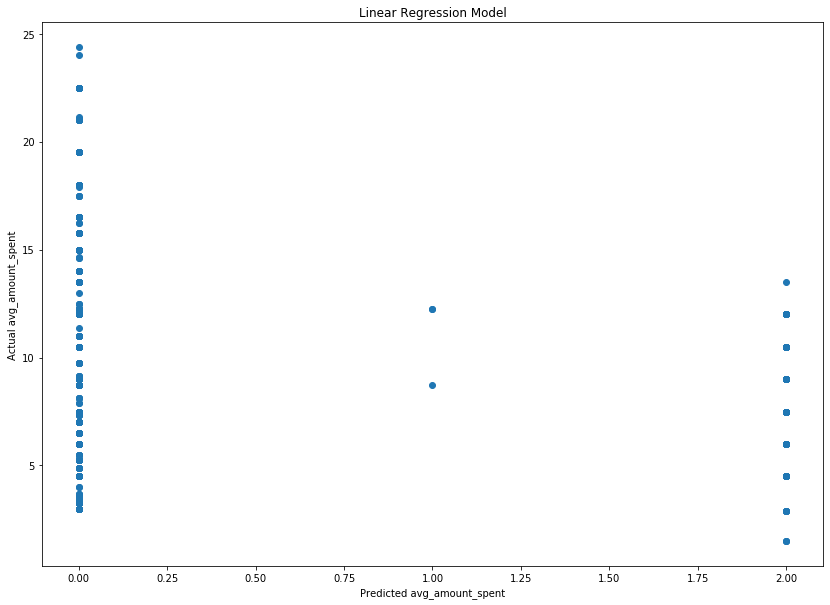

In [55]:
plt.figure(figsize = (14,10))

plt.scatter(y_pred, y_test) 

plt.xlabel('Predicted avg_amount_spent')
plt.ylabel('Actual avg_amount_spent')

plt.title('Linear Regression Model')

#Plotting predicted and actual values to visualize the model's performance